# Imports & Setup

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath("../../src"))

from wordcloud import WordCloud
from preprocessor import TextPreprocessor
from sentiment_analyzer import SentimentAnalyzer
from keyword_extractor import KeywordExtractor
from theme_classifier import ThemeClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumsam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumsam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kumsam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kumsam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
class ReviewPipeline:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.preprocessor = TextPreprocessor()
        self.sentiment_model = SentimentAnalyzer()
        self.extractor = KeywordExtractor(max_features=200)
        self.classifier = ThemeClassifier()

    def load_data(self):
        self.df = pd.read_csv(self.data_path)

    def preprocess_text(self):
        self.df["cleaned_review"] = self.df["review"].astype(str).apply(self.preprocessor.preprocess)

    def analyze_sentiments(self):
        self.df[["sentiment_label", "sentiment_score"]] = self.df["review"].apply(
            lambda x: pd.Series(self.sentiment_model.analyze(x))
        )

    def extract_keywords(self):
        return self.extractor.extract_keywords(self.df["cleaned_review"])

    def classify_themes(self):
        self.df["themes"] = self.df["cleaned_review"].apply(self.classifier.classify)

    def get_data(self):
        return self.df


#### handled by the pipeline class:

In [3]:
pipeline = ReviewPipeline("../../data/boa.csv")
pipeline.load_data()
pipeline.preprocess_text()
pipeline.analyze_sentiments()
pipeline.classify_themes()
keywords = pipeline.extract_keywords()

data = pipeline.get_data()  # get the processed DataFrame

In [4]:
df = data[data['bank'] == 'Bank of Abyssinia']

In [5]:
df.head()

,review,rating,date,bank,source,cleaned_review,sentiment_label,sentiment_score,themes
0,"Hello, I’m facing a problem with the BOA Mobil...",1,6/3/2025,Bank of Abyssinia,Google Play Store,hello im facing problem boa mobile app every t...,negative,-0.1884,"[Account Access Issues, Feature Requests, UI/UX]"
1,exceptional,5,6/3/2025,Bank of Abyssinia,Google Play Store,exceptional,neutral,0.0000,[Other]
2,BoA Mobile good bank,5,6/2/2025,Bank of Abyssinia,Google Play Store,boa mobile good bank,positive,0.4404,[Other]
3,this is worest app 24/7 loading,1,6/1/2025,Bank of Abyssinia,Google Play Store,worest app loading,neutral,0.0000,[UI/UX]
4,This App is not interest for Android phone Ple...,1,6/1/2025,Bank of Abyssinia,Google Play Store,app interest android phone please update,neutral,-0.0464,"[Feature Requests, UI/UX]"


# -------------------- Sentiment Analysis --------------------

# Sentiment Counts

In [6]:
sentiment_counts = df["sentiment_label"].value_counts()
print("Sentiment\n", sentiment_counts)

Sentiment
 sentiment_label
neutral     143
positive    126
negative    102
Name: count, dtype: int64


# Count Plot

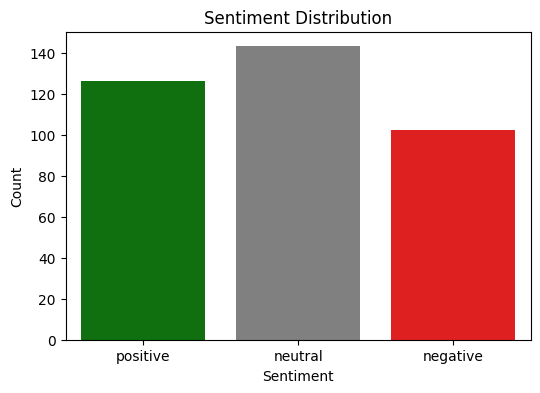

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x="sentiment_label",
    hue="sentiment_label",
    order=["positive", "neutral", "negative"],
    palette={"positive": "green", "neutral": "gray", "negative": "red"},
    legend=False
)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# WordClouds per Sentiment

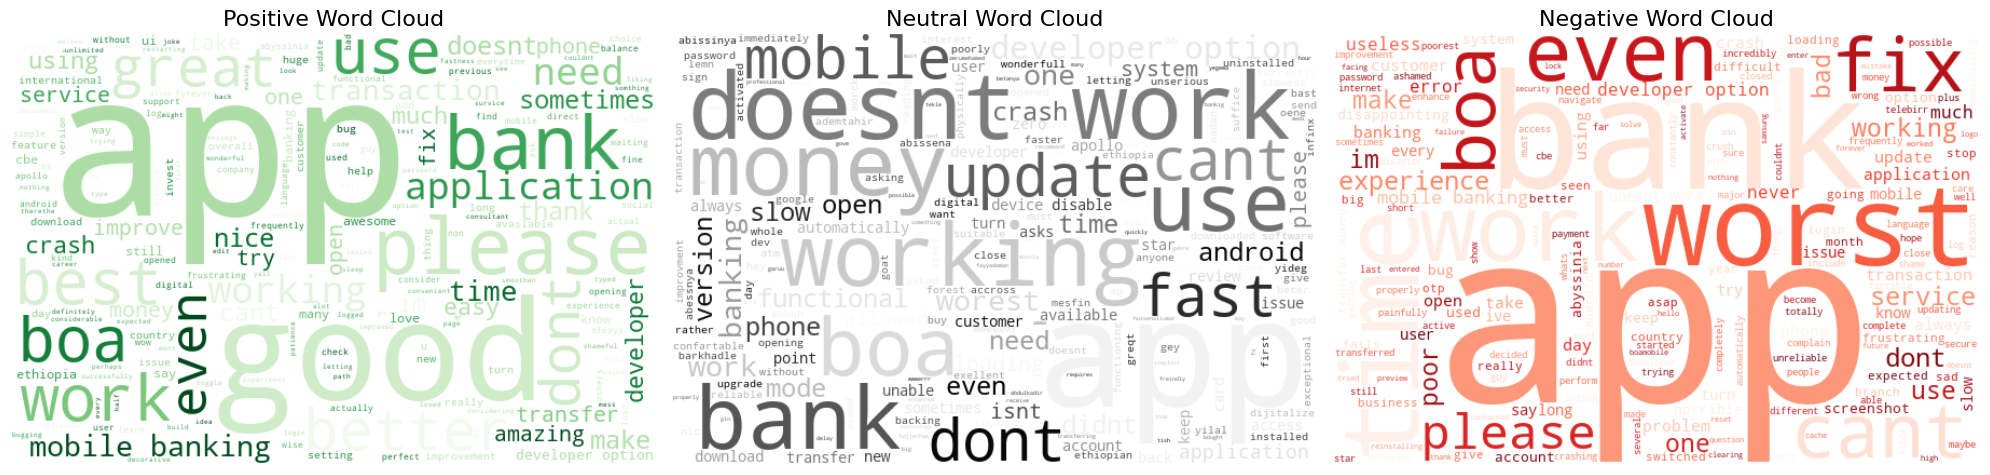

In [8]:
sentiments = ["positive", "neutral", "negative"]
colors = ["Greens", "Greys", "Reds"]
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, sentiment in enumerate(sentiments):
    text = " ".join(df[df["sentiment_label"] == sentiment]["cleaned_review"].dropna().astype(str))
    wordcloud = WordCloud(width=600, height=400, background_color="white", colormap=colors[idx]).generate(text)
    axes[idx].imshow(wordcloud, interpolation="bilinear")
    axes[idx].axis("off")
    axes[idx].set_title(f"{sentiment.capitalize()} Word Cloud", fontsize=16)

plt.tight_layout()
plt.show()

# Sample Reviews by Sentiment

In [9]:
for sentiment in sentiments:
    print(f"\nSample {sentiment} reviews:")
    sample_reviews = df[df["sentiment_label"] == sentiment]["cleaned_review"].head(5)
    for i, review in enumerate(sample_reviews, start=1):
        print(f"{i}. {review}")


Sample positive reviews:
1. boa mobile good bank
2. nice abyssinia bank choice
3. good service
4. app joke crash work take forever load half feature decorative point cant log cant transfer money cant even check balance without bugging developer actually trying make work kind social experiment test patience build sleep definitely look like idea functional app maybe consider different career path
5. liking application good

Sample neutral reviews:
1. exceptional
2. worest app loading
3. app interest android phone please update
4. boa system confartable
5. boa

Sample negative reviews:
1. hello im facing problem boa mobile app every time enter phone number password app crash show error say boamobile closed app bug tried updating reinstalling clearing cache nothing worked please fix bug next update really need access account thank
2. app waste time doesnt work cant even long really piss fix problem
3. app crush frequently
4. guy keep getting worst
5. worst app ever totally unreliable didn

# -------------- Sentiment score Distribution By User Rating --------------

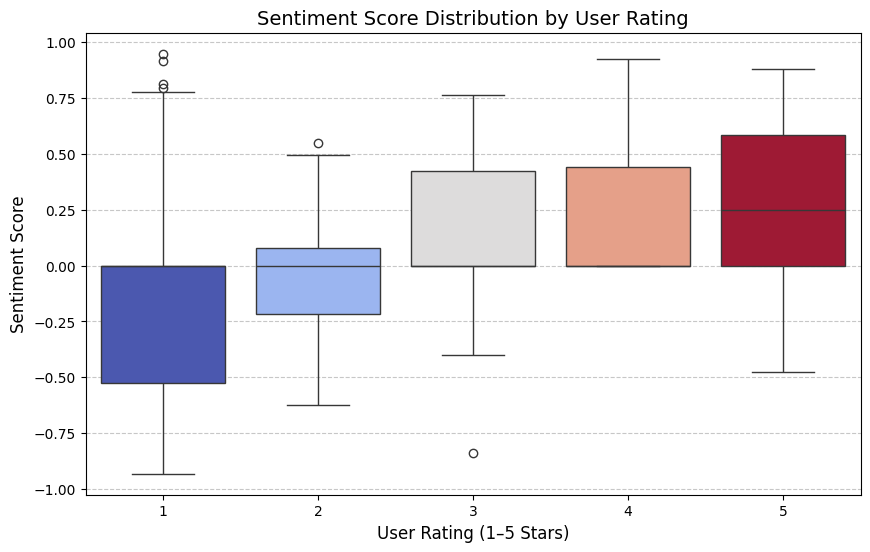

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="rating",
    y="sentiment_score",
    hue="rating",
    palette="coolwarm",
    legend=False
)
plt.title("Sentiment Score Distribution by User Rating", fontsize=14)
plt.xlabel("User Rating (1–5 Stars)", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Keywords from Pipeline

In [11]:
print("Top Keywords:", keywords)

Top Keywords: ['able' 'abyssinia' 'abyssinia bank' 'access' 'access account' 'account'
 'active' 'add' 'also' 'always' 'amazing' 'android' 'apollo' 'app'
 'app always' 'app boa' 'app crash' 'app dont' 'app ever' 'app never'
 'app service' 'application' 'apps' 'asks' 'automatically' 'available'
 'awesome' 'back' 'bad' 'bad app' 'bank' 'banking' 'banking app'
 'banking system' 'best' 'best app' 'better' 'big' 'birr' 'boa'
 'boa mobile' 'boa please' 'branch' 'bug' 'cant' 'cant even' 'card' 'care'
 'cbe' 'check' 'choice' 'close' 'couldnt' 'country' 'crash' 'customer'
 'day' 'developer' 'developer option' 'device' 'didnt' 'difficult'
 'disappointing' 'doesnt' 'doesnt work' 'dont' 'dont know' 'download'
 'easy' 'error' 'ethiopia' 'even' 'ever' 'every' 'every time' 'everytime'
 'expected' 'experience' 'fails' 'far' 'fast' 'feature' 'find' 'fine'
 'fix' 'forever' 'frequently' 'frustrating' 'functional' 'get' 'getting'
 'give' 'going' 'good' 'good app' 'good application' 'great' 'guy' 'help'
 '

# --------------------- Theme Classification -------------------

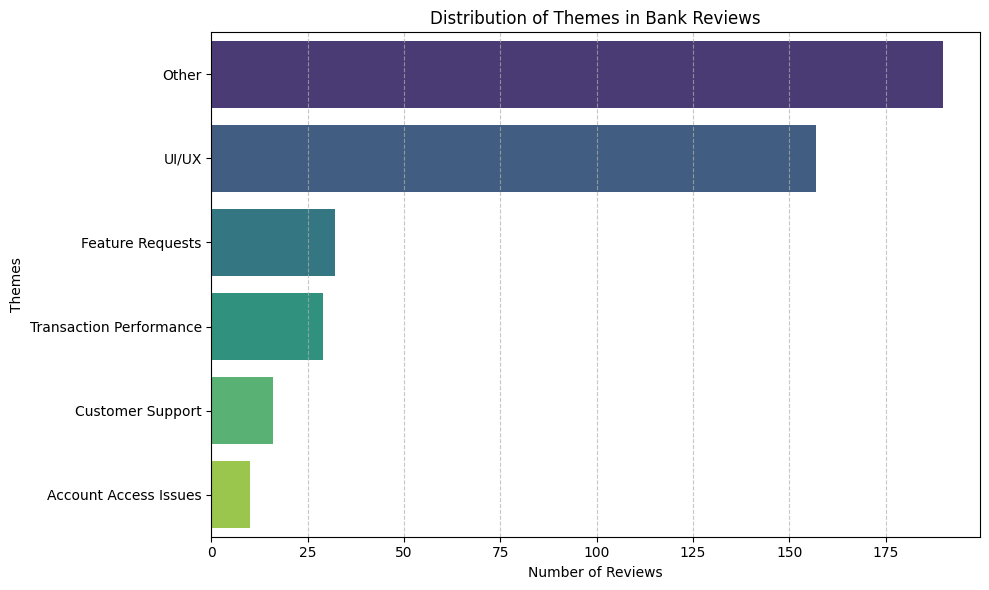

In [12]:
if "themes" in df.columns:
    theme_counts = df["themes"].explode().value_counts().reset_index()
    theme_counts.columns = ["theme", "count"]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=theme_counts,
        x="count",
        y="theme",
        hue="theme",
        palette="viridis",
        dodge=False,
        legend=False
    )
    plt.title("Distribution of Themes in Bank Reviews")
    plt.xlabel("Number of Reviews")
    plt.ylabel("Themes")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'themes' not found in the DataFrame.")